In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.nn import relu
import numpy as np
import pandas as pd

tf.enable_eager_execution()

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df = pd.DataFrame(iris.data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# DataFrame 모든 행 표시
pd.set_option('display.max_rows', None)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df.columns = iris.feature_names
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
df['kind'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kind
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


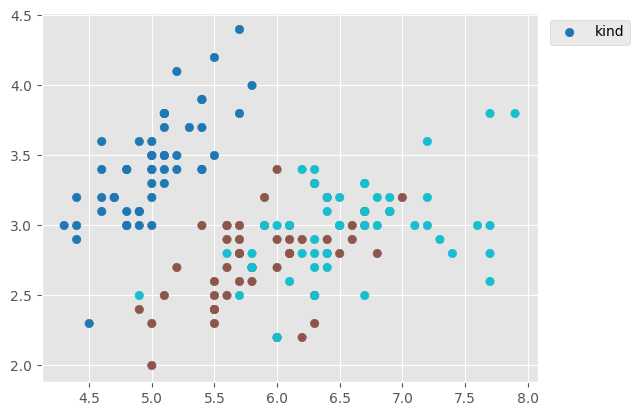

In [9]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df.kind, cmap='tab10', label='kind')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.show()

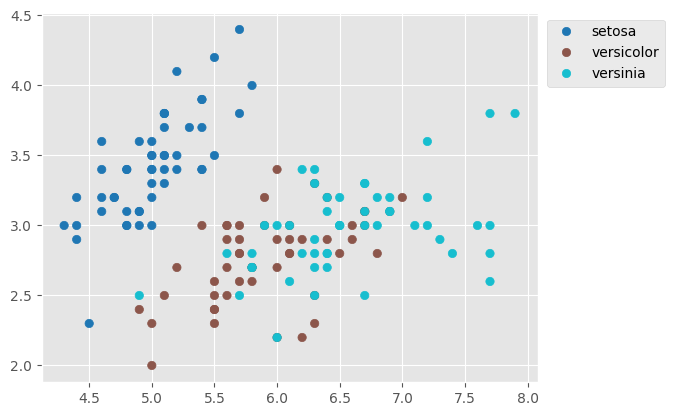

In [10]:
# 각각 점들의 범례 설정
# object.legned_elements()[0] : 설정객체들의 범례, legend_elements()[1] : 기본범례
sc = plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df.kind, cmap='tab10')

plt.legend(
			handles = sc.legend_elements()[0],
			labels=['setosa', 'versicolor', 'versinia'],
			bbox_to_anchor=(1.27, 1),
			loc='upper right'
			)
plt.show()

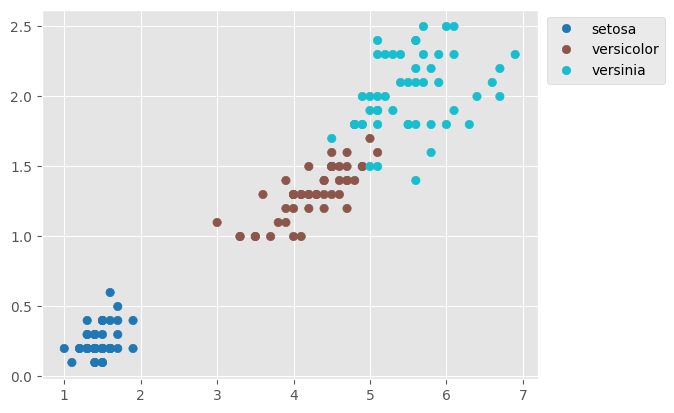

In [11]:
pc = plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df.kind, cmap='tab10')

plt.legend(
	handles = pc.legend_elements()[0],
	labels = ['setosa', 'versicolor', 'versinia'],
	bbox_to_anchor = (1.27, 1),
	loc='upper right'
)
plt.show()

In [12]:
X = iris.data
y = iris.target
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [13]:
X = np.array(X, dtype='float32')
y = y.reshape(-1, 1)

In [14]:
# model의 성능을 test하기 위해 train data와 test data를 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
enc = OneHotEncoder()

In [16]:
enc.fit(y)

OneHotEncoder()

In [34]:
# transform(value) : value로 들어온 index를 1 나머지를 0으로 변환
# .toarray() -> 계산한 결과를 출력
enc.transform([
				[2],
				[0],
				[1]
			]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [17]:
y_train_onehot = enc.transform(y_train).toarray()
y_train_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0

In [18]:
y_train_onehot = np.array(y_train_onehot, dtype='float32')
y_train_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0

In [19]:
y_test_onehot = enc.transform(y_test).toarray()
y_test_onehot

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [20]:
y_test_onehot = np.array(y_test_onehot, dtype='float32')
y_test_onehot

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train = scaler.transform(X_train)
X_train

array([[-9.42041516e-01,  1.66207206e+00, -1.32456923e+00,
        -1.22768438e+00],
       [-1.06438446e+00,  9.92031872e-01, -1.43954098e+00,
        -1.22768438e+00],
       [-4.52669263e-01, -1.01808929e+00,  3.42519790e-01,
        -3.21034826e-02],
       [ 8.93104076e-01, -1.24701940e-01,  3.42519790e-01,
         2.33581051e-01],
       [-1.06438446e+00,  5.45338213e-01, -1.38205516e+00,
        -1.36052680e+00],
       [-9.42041516e-01,  9.92031872e-01, -1.38205516e+00,
        -1.22768438e+00],
       [ 1.13779044e+00, -1.24701940e-01,  9.74863887e-01,
         1.16347718e+00],
       [ 3.67030352e-02, -1.24701940e-01,  2.27547958e-01,
         3.66423398e-01],
       [-2.07983389e-01,  1.66207206e+00, -1.20959759e+00,
        -1.22768438e+00],
       [ 2.81388879e-01, -1.24701940e-01,  4.57491338e-01,
         2.33581051e-01],
       [-8.56398791e-02, -1.01808929e+00,  1.12576418e-01,
        -3.21034826e-02],
       [-2.07983389e-01,  3.00215292e+00, -1.32456923e+00,
      

In [24]:
initializer = tf.contrib.layers.xavier_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [25]:
w0 = tf.Variable(initializer([4, 16]))
b0 = tf.Variable(initializer([16]))
w0, b0

(<tf.Variable 'Variable:0' shape=(4, 16) dtype=float32, numpy=
 array([[ 1.28762543e-01, -1.97816938e-01, -4.64920729e-01,
         -3.74052912e-01,  3.66672754e-01,  2.88031340e-01,
          4.18192029e-01, -4.67609912e-01, -2.35985249e-01,
         -5.38939297e-01,  2.27651298e-01, -4.51589882e-01,
         -5.25957882e-01, -5.00217319e-01, -2.66741812e-01,
          7.96954036e-02],
        [ 3.93643975e-01,  2.21897364e-01,  2.92406261e-01,
         -2.62849003e-01,  3.96989405e-01,  3.13981175e-02,
          1.50552571e-01, -3.46161574e-01, -3.91740173e-01,
         -3.19876194e-01,  1.73434198e-01,  1.63510084e-01,
         -4.91633415e-02, -5.03817856e-01, -1.80931896e-01,
          1.89655364e-01],
        [-4.79518563e-01, -7.62201250e-02,  1.08950913e-01,
          2.65277684e-01,  4.44435358e-01, -1.99799776e-01,
         -3.13671857e-01, -7.76821673e-02, -2.57167011e-01,
         -3.66358578e-01,  1.23083174e-01,  2.63281882e-01,
          3.54635656e-01, -7.31861591e-03, 

In [26]:
w1 = tf.Variable(initializer([16, 3]))
b1 = tf.Variable(initializer([3]))
w1, b1

(<tf.Variable 'Variable:0' shape=(16, 3) dtype=float32, numpy=
 array([[ 0.3677917 ,  0.3447029 ,  0.38601804],
        [ 0.00146532, -0.2122814 ,  0.3092382 ],
        [-0.02822405, -0.18719035,  0.15408039],
        [-0.37806115, -0.2139642 , -0.29611892],
        [ 0.3305521 , -0.39080235,  0.1500268 ],
        [ 0.54953474,  0.02398479,  0.2857387 ],
        [ 0.15879697, -0.15966329, -0.1422146 ],
        [ 0.1127345 ,  0.486638  , -0.25920418],
        [-0.00964361, -0.0691599 , -0.5603937 ],
        [ 0.47892636, -0.12390843, -0.40260327],
        [-0.38824856,  0.46334654, -0.3232384 ],
        [-0.3663974 ,  0.2777468 ,  0.1487931 ],
        [-0.4551619 , -0.43688035, -0.16487405],
        [ 0.5544829 ,  0.5293315 , -0.18077195],
        [ 0.12166548, -0.41740376,  0.5315097 ],
        [-0.47144175,  0.55136544, -0.07628587]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([-0.2669592 ,  0.17986012,  0.92417145], dtype=float32)>)

In [27]:
tf.matmul(X_train, w0) + b0

<tf.Tensor: id=65, shape=(120, 16), dtype=float32, numpy=
array([[ 1.2537825 ,  0.4260166 ,  0.6711366 , ...,  0.38940704,
        -0.72682905,  0.596756  ],
       [ 1.0294032 ,  0.31030115,  0.5195661 , ...,  0.7890247 ,
        -0.5740269 ,  0.45839393],
       [-0.41512105, -0.52488613,  0.23320112, ...,  1.111723  ,
         0.0857168 ,  0.15017883],
       ...,
       [-0.6241629 , -0.7520765 ,  0.0541129 , ...,  0.6570404 ,
        -0.00532094,  0.21799509],
       [ 0.7047738 ,  0.24892673,  0.4507651 , ...,  1.35142   ,
        -0.40408605,  0.30201453],
       [ 0.48167595,  0.22241113,  0.49078843, ...,  1.7600664 ,
        -0.225363  ,  0.18804616]], dtype=float32)>

In [28]:
hypothesis0 = tf.sigmoid(tf.matmul(X_train, w0) + b0)
hypothesis0

<tf.Tensor: id=71, shape=(120, 16), dtype=float32, numpy=
array([[0.7779539 , 0.60492206, 0.6617576 , ..., 0.5961399 , 0.32589096,
        0.6449138 ],
       [0.7368002 , 0.5769588 , 0.6270463 , ..., 0.6876219 , 0.36030817,
        0.6126331 ],
       [0.39768484, 0.37171042, 0.5580375 , ..., 0.75245017, 0.52141607,
        0.5374743 ],
       ...,
       [0.3488353 , 0.32036904, 0.51352495, ..., 0.6585952 , 0.49866977,
        0.554284  ],
       [0.6692453 , 0.5619123 , 0.6108211 , ..., 0.7943617 , 0.40033102,
        0.5749349 ],
       [0.61814356, 0.5553747 , 0.6202921 , ..., 0.85321796, 0.4438965 ,
        0.5468735 ]], dtype=float32)>

In [29]:
hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1)
hypothesis1

<tf.Tensor: id=76, shape=(120, 3), dtype=float32, numpy=
array([[0.22947617, 0.34959963, 0.4209242 ],
       [0.250776  , 0.37277192, 0.37645206],
       [0.22352073, 0.43795723, 0.338522  ],
       [0.19743846, 0.39233738, 0.41022414],
       [0.26363987, 0.3809957 , 0.35536438],
       [0.24920258, 0.36996794, 0.3808295 ],
       [0.16738506, 0.401109  , 0.43150598],
       [0.19826339, 0.41552076, 0.38621578],
       [0.22379372, 0.3318467 , 0.4443596 ],
       [0.19527821, 0.4053346 , 0.39938718],
       [0.23007843, 0.4331966 , 0.33672497],
       [0.18722592, 0.2938459 , 0.5189282 ],
       [0.16268064, 0.41050047, 0.42681894],
       [0.27046657, 0.39876437, 0.3307691 ],
       [0.27542865, 0.39013746, 0.33443388],
       [0.24389818, 0.42845073, 0.32765102],
       [0.22237805, 0.3379812 , 0.43964073],
       [0.30314735, 0.42275563, 0.27409706],
       [0.22649671, 0.42784482, 0.34565845],
       [0.18273352, 0.37723148, 0.44003505],
       [0.20635654, 0.30674377, 0.48689964]

In [30]:
optimizer = tf.train.AdamOptimizer(0.1)

In [35]:
for step in range(1001) :
	with tf.GradientTape() as tape :
		hypothesis0 = tf.sigmoid(tf.matmul(X_train, w0) + b0)
		hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1)
		cost = -tf.reduce_sum(y_train_onehot * tf.log(hypothesis1)) / len(hypothesis1)
		grads = tape.gradient(cost, [w0, w1, b0, b1])

	optimizer.apply_gradients(grads_and_vars=zip(grads, [w0, w1, b0, b1]))
	
	if step % 100 == 0 :
		print('=' * 100)
		print(f'step : {step}, cost : {cost}')
		print('=' * 100)

step : 0, cost : 1.0291924476623535
step : 100, cost : 0.036731649190187454
step : 200, cost : 0.03108849562704563
step : 300, cost : 0.0210595540702343
step : 400, cost : 0.004800050985068083
step : 500, cost : 0.0019304429879412055
step : 600, cost : 0.0011210168013349175
step : 700, cost : 0.0007592525216750801
step : 800, cost : 0.0005574983661063015
step : 900, cost : 0.00043035828275606036
step : 1000, cost : 0.0003438502608332783


In [36]:
w0, b0

(<tf.Variable 'Variable:0' shape=(4, 16) dtype=float32, numpy=
 array([[-4.9990845 , -4.888852  , -4.4004626 ,  0.8847091 , -1.5439423 ,
         -1.099514  , -0.8579548 , -7.526705  ,  0.4771783 , -0.64808404,
          1.3839209 ,  0.3076501 , 13.707393  ,  1.3063575 , -1.2562798 ,
          4.1984015 ],
        [ 8.844693  ,  5.075805  ,  2.9301255 , -1.4844446 ,  1.6163344 ,
          1.3864347 ,  4.9056854 , -2.070218  ,  0.4085858 ,  3.1623013 ,
         -1.3922684 , -1.1945937 ,  2.163167  ,  5.1542563 ,  0.7445702 ,
         -0.12672931],
        [-2.975835  , -3.544302  ,  8.754848  ,  2.3384511 , -1.5793223 ,
         -2.071213  , -2.3517354 , -5.8709273 , -3.322584  , -1.8944353 ,
          1.9757056 ,  1.7854705 ,  5.566191  , -2.8105695 ,  5.2941194 ,
          1.6486185 ],
        [-1.8030516 , 10.068102  ,  4.3189583 ,  2.7313612 , -2.4926193 ,
         -1.8117412 , -2.292761  , -1.9778773 , -3.0421963 , -1.4463538 ,
          2.6465414 ,  2.1389556 , -1.8422707 , -3.240

In [37]:
w1, b1

(<tf.Variable 'Variable:0' shape=(16, 3) dtype=float32, numpy=
 array([[ 1.6539618 ,  1.437744  , -4.0250382 ],
        [-0.443798  , -4.9443283 ,  6.8279285 ],
        [-0.8894978 , -2.8429477 ,  5.1076665 ],
        [-2.1510534 ,  1.7189379 ,  0.7276142 ],
        [ 2.4082325 , -2.4872456 , -1.466733  ],
        [ 2.619262  , -1.982454  , -1.579773  ],
        [ 1.652134  ,  0.5737018 , -4.342144  ],
        [ 0.86924446,  2.887314  , -6.487964  ],
        [ 1.5590079 ,  1.7114489 , -4.8556924 ],
        [ 1.5577611 ,  0.2757542 , -3.8921843 ],
        [-2.2968042 ,  2.8800082 ,  0.5108162 ],
        [-1.8276045 ,  1.6531391 ,  1.5161856 ],
        [-0.8056668 , -4.0796046 ,  5.384727  ],
        [ 1.6348592 ,  2.1128168 , -4.175312  ],
        [-0.995749  , -2.4824934 ,  4.701488  ],
        [-1.7617489 ,  3.2818096 , -1.0685728 ]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([-0.12693536,  0.44057697,  0.08971143], dtype=float32)>)

In [38]:
X_test = scaler.transform(X_test)
X_test

array([[-1.1867274 ,  1.2153784 , -1.3820552 , -1.493369  ],
       [ 0.5260753 ,  0.5453382 ,  0.5149771 ,  0.49926573],
       [-0.33032632, -0.12470194,  0.17006218,  0.10073871],
       [-1.3090703 ,  0.76868534, -1.0946261 , -1.3605268 ],
       [ 0.77076113,  0.32199168,  0.7449205 ,  1.030635  ],
       [ 0.5260753 ,  0.76868534,  1.0323496 ,  1.5620044 ],
       [-1.3090703 , -0.12470194, -1.3820552 , -1.2276844 ],
       [ 0.15904596, -1.911476  ,  0.11257642, -0.29778817],
       [ 1.3824763 ,  0.32199168,  0.5149771 ,  0.23358105],
       [-0.6973551 ,  1.4387255 , -1.3245692 , -1.3605268 ],
       [-1.9207855 , -0.12470194, -1.5545126 , -1.493369  ],
       [-0.81969863,  0.76868534, -1.3820552 , -1.3605268 ],
       [-0.20798339, -0.3480485 ,  0.22754796,  0.10073871],
       [-0.08563988, -0.5713956 ,  0.7449205 ,  1.5620044 ],
       [ 0.77076113, -0.5713956 ,  0.45749134,  0.3664234 ],
       [-0.81969863,  0.9920319 , -1.3245692 , -1.3605268 ],
       [-1.0643845 ,  0.

In [40]:
hypothesis0 = tf.sigmoid(tf.matmul(X_test, w0) + b0)
predict = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1)
predict

<tf.Tensor: id=82275, shape=(30, 3), dtype=float32, numpy=
array([[9.9999535e-01, 4.6149216e-06, 1.1814634e-17],
       [1.8140898e-03, 6.2459964e-01, 3.7358627e-01],
       [4.3909262e-05, 9.9995613e-01, 1.7278914e-11],
       [9.9998081e-01, 1.9210012e-05, 1.3167365e-18],
       [1.2558707e-11, 9.2837453e-09, 1.0000000e+00],
       [6.1154116e-11, 2.6509046e-08, 1.0000000e+00],
       [9.9988723e-01, 1.1277361e-04, 9.6622425e-20],
       [3.5119900e-09, 1.0000000e+00, 5.4274286e-11],
       [2.2337515e-06, 9.9999750e-01, 2.5513199e-07],
       [9.9999464e-01, 5.3720664e-06, 1.0128045e-17],
       [9.9993873e-01, 6.1256324e-05, 1.9014085e-19],
       [9.9993062e-01, 6.9422538e-05, 1.6856208e-19],
       [5.1011006e-07, 9.9999952e-01, 8.6030748e-12],
       [4.2429615e-11, 3.4334955e-06, 9.9999654e-01],
       [5.1716836e-07, 9.9536163e-01, 4.6379683e-03],
       [9.9996877e-01, 3.1218875e-05, 6.0006928e-19],
       [9.9999809e-01, 1.8540869e-06, 6.9563587e-17],
       [5.5982876e-09, 

In [41]:
predict01 = tf.argmax(predict, 1)
predict01

<tf.Tensor: id=82277, shape=(30,), dtype=int64, numpy=
array([0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 1, 1], dtype=int64)>

In [42]:
target = tf.argmax(y_test_onehot, 1)
target

<tf.Tensor: id=82280, shape=(30,), dtype=int64, numpy=
array([0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 2, 2,
       0, 0, 2, 0, 2, 2, 1, 1], dtype=int64)>

In [43]:
ac01 = tf.equal(predict01, target)
ac01

<tf.Tensor: id=82281, shape=(30,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])>

In [44]:
ac02 = tf.cast(ac01, dtype='float32')
ac02

<tf.Tensor: id=82282, shape=(30,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [45]:
ac03 = tf.reduce_mean(ac02)
ac03

<tf.Tensor: id=82284, shape=(), dtype=float32, numpy=0.93333334>

In [47]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict01, target), dtype='float32'))
print('=' * 100)
print('accuracy')
print(accuracy.numpy())

accuracy
0.93333334
